# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

4. Yes, a non-decreasing transformation of the median preserves the order of data. The median is the middle value (or the average of two middle values) in a sorted dataset. Non-decreasing transformations do not change the order of the data, so applying such a transformation to the median is equivalent to taking the median of the transformed variable. However, this does not apply to measures like the interquartile range (IQR) or range, as these depend on the distances between values, which change under transformations like 2 + 5 x 𝑋

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [1]:
#1
import pandas as pd

data = pd.read_csv('ForeignGifts_edu.csv')
data.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


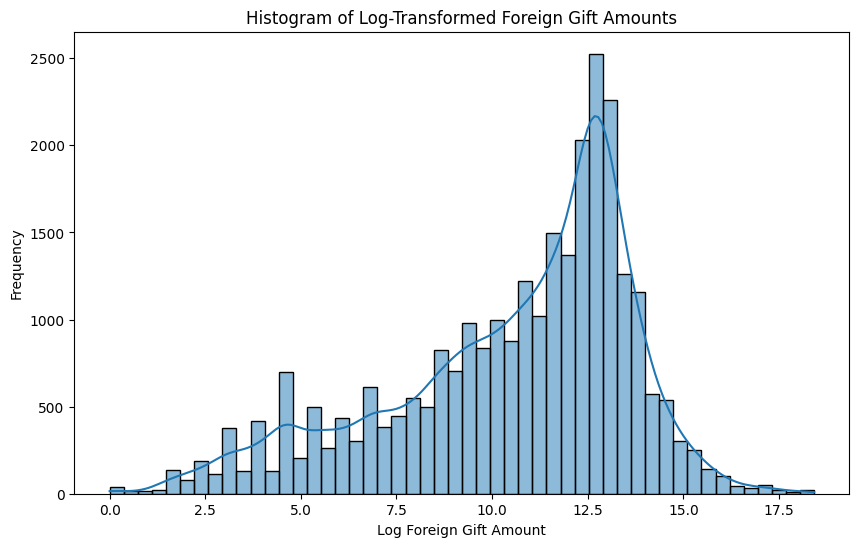

In [5]:
#2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exclude negative or zero values and apply log transformation
data_positive = data[data['Foreign Gift Amount'] > 0].copy()
data_positive['Log Foreign Gift Amount'] = np.log(data_positive['Foreign Gift Amount'])

# Plot histogram for log-transformed Foreign Gift Amount
plt.figure(figsize=(10, 6))
sns.histplot(data_positive['Log Foreign Gift Amount'], bins=50, kde=True)
plt.title('Histogram of Log-Transformed Foreign Gift Amounts')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#The Foreign Gift Amount spans a wide range, from small amounts to extreme outliers
#(up to $100,000,000), causing the raw data to be heavily skewed and difficult to interpret.
#A log transformation compresses the scale, making the distribution easier to visualize while
#preserving relative differences. The histogram shows that most gifts fall between $50,000 and $10,000,000,
#with a right-skewed distribution even after the transformation. A few large outliers are visible in the tail,
#while the majority of gifts cluster around smaller amounts.


In [6]:
#3
# Value counts for Gift Type
gift_type_counts = data['Gift Type'].value_counts(normalize=True) * 100
gift_type_counts

,proportion
Gift Type,
Contract,61.209737
Monetary Gift,38.751285
Real Estate,0.038978


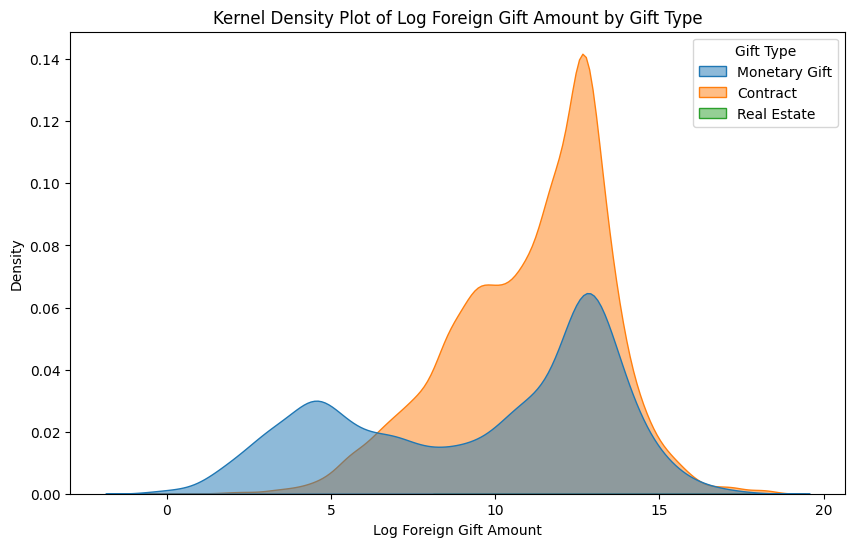

In [7]:
#4
# Add log-transformed Foreign Gift Amount column (exclude negative/zero values)
data_positive = data[data['Foreign Gift Amount'] > 0].copy()
data_positive['Log Foreign Gift Amount'] = np.log(data_positive['Foreign Gift Amount'])

# Kernel density plot by Gift Type
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_positive, x='Log Foreign Gift Amount', hue='Gift Type', fill=True, alpha=0.5)
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

In [ ]:
#Contracts tend to involve larger gift amounts, peaking around log 10 (equivalent to $22,000),
#with a wider range extending to higher values. Monetary gifts are generally smaller,
#peaking around log ~8 (~$3,000), and have a narrower distribution. Real estate gifts are rare
# and minimally represented in the data.

In [8]:
#5
# Top 15 countries by number of gifts
top_countries_count = data['Country of Giftor'].value_counts().head(15)

# Top 15 countries by total amount
top_countries_amount = data.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

top_countries_count, top_countries_amount

(Country of Giftor
 ENGLAND            3655
 CHINA              2461
 CANADA             2344
 JAPAN              1896
 SWITZERLAND        1676
 SAUDI ARABIA       1610
 FRANCE             1437
 GERMANY            1394
 HONG KONG          1080
 SOUTH KOREA         811
 QATAR               693
 THE NETHERLANDS     512
 KOREA               452
 INDIA               434
 TAIWAN              381
 Name: count, dtype: int64,
 Country of Giftor
 QATAR                   2706240869
 ENGLAND                 1464906771
 CHINA                   1237952112
 SAUDI ARABIA            1065205930
 BERMUDA                  899593972
 CANADA                   898160656
 HONG KONG                887402529
 JAPAN                    655954776
 SWITZERLAND              619899445
 INDIA                    539556490
 GERMANY                  442475605
 UNITED ARAB EMIRATES     431396357
 FRANCE                   405839396
 SINGAPORE                401157692
 AUSTRALIA                248409202
 Name: Foreign Gift

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


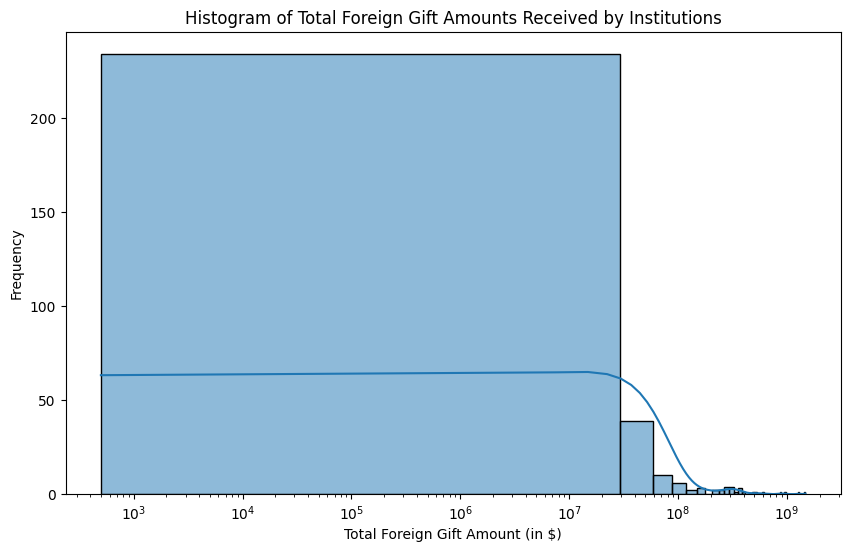

In [12]:
#6
# Top 15 institutions by total amount
top_institutions_amount = data.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

print(top_institutions_amount)

# Group the total amount received by institutions
institution_totals = data.groupby('Institution Name')['Foreign Gift Amount'].sum()

# Plot histogram for total amounts received by institutions
plt.figure(figsize=(10, 6))
sns.histplot(institution_totals, bins=50, kde=True)
plt.title('Histogram of Total Foreign Gift Amounts Received by Institutions')
plt.xlabel('Total Foreign Gift Amount (in $)')
plt.ylabel('Frequency')
plt.xscale('log')  # Use a log scale for better visualization
plt.show()

In [10]:
#7
# Top 15 giftors by total amount
top_giftors = data.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

top_giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
# Load the drilling rigs dataset and examine it
drilling_rigs_path = 'drilling_rigs.csv'
drilling_rigs = pd.read_csv(drilling_rigs_path)

#This dataset contains 623 rows and 10 columns. Key variables include:
# - "Month" (time variable in string format) that needs to be converted to datetime.
# - "Active Well Service Rig Count (Number of Rigs)" contains numeric data in string format and needs to be cleaned.
# Some columns also contain "Not Available" and need handling during data cleaning.

print(drilling_rigs.info())
print(drilling_rigs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

In [17]:
# 2. Convert 'Month' to datetime and clean 'Active Well Service Rig Count'
# Convert the 'Month' column to an ordered datetime variable
drilling_rigs['Month'] = pd.to_datetime(drilling_rigs['Month'], format='%Y %B', errors='coerce')

# Convert 'Active Well Service Rig Count' to numeric, handling invalid values as NaN
drilling_rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    drilling_rigs['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)

# The 'Month' column was successfully converted to datetime format,
# allowing time-series analysis. Invalid entries in 'Active Well Service Rig Count'
# were replaced with NaN for proper numeric operations.

print(drilling_rigs.info())
print(drilling_rigs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   Month                                                                                        623 non-null    datetime64[ns]
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64         
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64         
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object        
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object 

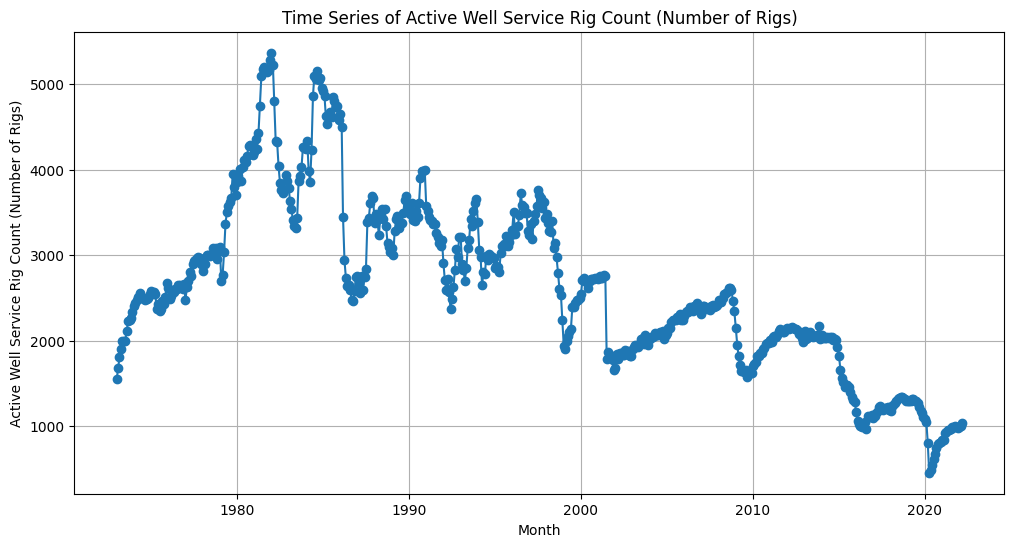

In [18]:
# 3. Plot the time series for 'Active Well Service Rig Count'
plt.figure(figsize=(12, 6))
plt.plot(drilling_rigs['Month'], drilling_rigs['Active Well Service Rig Count (Number of Rigs)'], marker='o', linestyle='-')
plt.title('Time Series of Active Well Service Rig Count (Number of Rigs)')
plt.xlabel('Month')
plt.ylabel('Active Well Service Rig Count (Number of Rigs)')
plt.grid()
plt.show()

# The time series shows that the active well service rig count peaked
# in the late 1970s and early 1980s, followed by fluctuations and a gradual decline.
# Recent years exhibit sharp drops, likely reflecting economic or market disruptions.

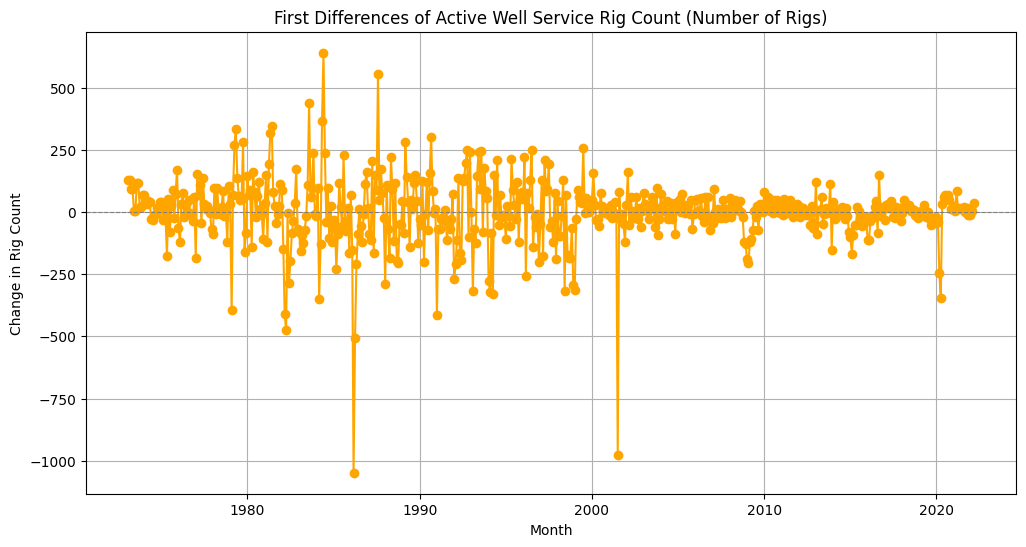

In [19]:

# 4. Compute the first differences of 'Active Well Service Rig Count'
# Compute the first difference to analyze changes over time
drilling_rigs['Rig Count Change'] = drilling_rigs['Active Well Service Rig Count (Number of Rigs)'].diff()

# Plot the first differences over time
plt.figure(figsize=(12, 6))
plt.plot(drilling_rigs['Month'], drilling_rigs['Rig Count Change'], marker='o', linestyle='-', color='orange')
plt.title('First Differences of Active Well Service Rig Count (Number of Rigs)')
plt.xlabel('Month')
plt.ylabel('Change in Rig Count')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Reference line for zero change
plt.grid()
plt.show()

# The first differences reveal periods of high volatility with sharp increases
# and decreases in rig counts. Large negative changes indicate significant disruptions
# in the market, particularly during economic downturns.

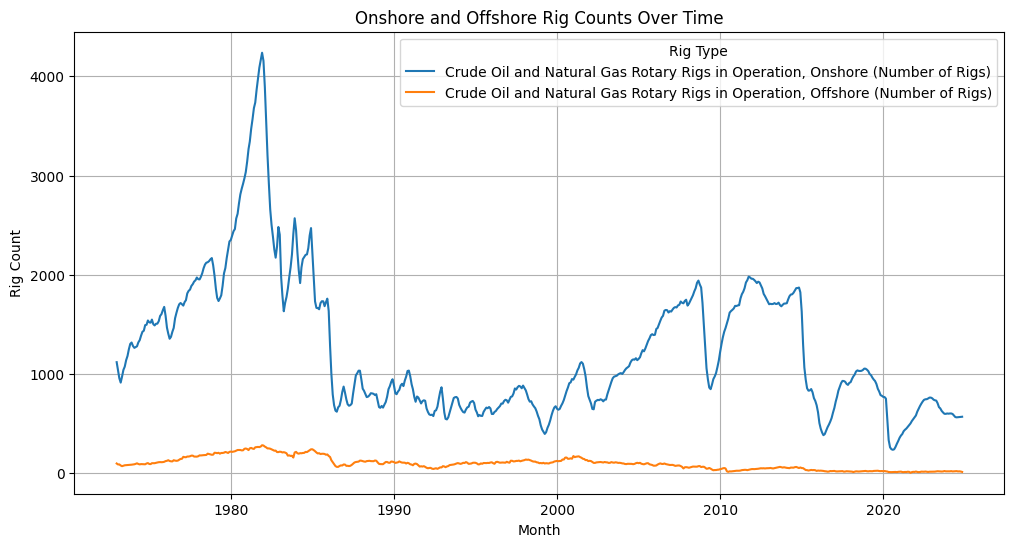

In [20]:
# 5. Melt the first two columns (Onshore and Offshore Rig Counts) for visualization
melted_rigs = pd.melt(
    drilling_rigs,
    id_vars=['Month'],
    value_vars=[
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
    ],
    var_name='Rig Type',
    value_name='Rig Count'
)

# Plot the melted data
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_rigs, x='Month', y='Rig Count', hue='Rig Type')
plt.title('Onshore and Offshore Rig Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Rig Count')
plt.legend(title='Rig Type', loc='upper right')
plt.grid()
plt.show()

# Onshore rigs consistently outnumber offshore rigs across all time periods.
# Offshore rig counts show smaller fluctuations, while onshore rigs display significant
# peaks and declines, reflecting their dominant role in the market.